# Toward Autonomous and Efficient Cybersecurity: A Multi Objective AutoML based Intrusion Detection System 
This is the code for the paper entitled "[**Toward Autonomous and Efficient Cybersecurity: A Multi Objective AutoML based Intrusion Detection System**](https://ieeexplore.ieee.org/document/11240569/)" published in IEEE Transactions on Machine Learning in Communications and Networking (TMLCN).  
Authors: Li Yang (liyanghart@gmail.com) and Abdallah Shami  

If you find this repository useful in your research, please cite this article as:  
L. Yang and A. Shami, “Towards Autonomous and Efficient Cybersecurity: A Multi Objective AutoML based Intrusion Detection System,” _IEEE Transactions on Machine Learning in Communications and Networking_, pp. 1–21, 2025, doi: [10.1109/TMLCN.2025.3631379](https://ieeexplore.ieee.org/document/11240569/)   

```
@ARTICLE{11240569,
  author={Yang, Li and Shami, Abdallah},
  journal={IEEE Transactions on Machine Learning in Communications and Networking}, 
  title={Towards Autonomous and Efficient Cybersecurity: A Multi-Objective AutoML-based Intrusion Detection System}, 
  year={2025},
  pages={1-21},
  keywords={Computer security;Automated machine learning;Optimization;Internet of Things;Intrusion detection;Feature extraction;Data models;Data analysis;Benchmark testing;Adaptation models;Network Automation;AutoML;Multi-Objective Optimization;Cybersecurity;Intrusion Detection System;IoT},
  doi={10.1109/TMLCN.2025.3631379}}
```


## Import libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import lightgbm as lgb
import xgboost as xgb
import joblib
import os
import time

## Dataset 1: CICIDS2017
The CICIDS2017 dataset is publicly available at: https://www.unb.ca/cic/datasets/ids-2017.html  

Due to the large size of this dataset and the file size limit of GitHub, the sampled subset of CICIDS2017 is used. The subsets are in the "Data" folder.  PS: The results might be different from the paper due to the size difference of the dataset.

The Canadian Institute for Cybersecurity Intrusion Detection System 2017 (CICIDS2017) dataset has the most updated network threats. The CICIDS2017 dataset is close to real-world network data since it has a large amount of network traffic data, a variety of network features, various types of attacks, and highly imbalanced classes.

If you want to use this code on other datasets, just change the dataset name and follow the same steps. The models in this code are generic models that can be used in any intrusion detection/network traffic datasets.

In [3]:
# Read the dataset
df = pd.read_csv("Data/CICIDS2017_sample_km.csv")


In [4]:
# Display the data
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,4.171167e-02,0.000018,0.000010,4.643411e-05,3.083364e-06,0.024134,0.000000,0.020165,0.037594,0.103482,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26796,4.180643e-02,0.000018,0.000017,4.643411e-05,6.329973e-06,0.024134,0.000000,0.020165,0.037594,0.138300,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26797,4.174313e-02,0.000014,0.000014,4.643411e-05,3.083364e-06,0.024134,0.000000,0.025207,0.042032,0.103482,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26798,7.166666e-07,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [5]:
df.Label.value_counts()

Label
0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: count, dtype: int64

**Corresponding Attack Types:**  
0 BENIGN &emsp; 18225  
3 DoS        &emsp;   &emsp;   3042  
6 WebAttack    &emsp;      2180  
1 Bot        &emsp;  &emsp;      1966    
5 PortScan  &emsp;       1255  
2 BruteForce  &emsp;      96  
4 Infiltration  &emsp;       36  

## 1. Automated Data Pre-Processing

### Automated normalization
Normalize the range of features to a similar scale to improve data quality

In [6]:
from scipy.stats import shapiro
def Auto_Normalization(df):
    stat, p = shapiro(df)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    numeric_features = df.drop(['Label'],axis = 1).dtypes[df.dtypes != 'object'].index
    
    # The selection strategy is based on the following article: 
    # https://medium.com/@kumarvaishnav17/standardization-vs-normalization-in-machine-learning-3e132a19c8bf
    # Check if the data distribution follows a Gaussian/normal distribution
    # If so, select the Z-score normalization method; otherwise, select the min-max normalization
    # Details are in the paper
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        df[numeric_features] = df[numeric_features].apply(
            lambda x: (x - x.mean()) / (x.std()))
        print('Z-score normalization is automatically chosen and used')
    else:
        print('Sample does not look Gaussian (reject H0)')
        df[numeric_features] = df[numeric_features].apply(
            lambda x: (x - x.min()) / (x.max()-x.min()))
        print('Min-max normalization is automatically chosen and used')
    return df
df = Auto_Normalization(df)

Statistics=0.273, p=0.000
Sample does not look Gaussian (reject H0)
Min-max normalization is automatically chosen and used


In [7]:
# Address missing and infinite values
if df.isnull().values.any() or np.isinf(df).values.any(): # if there is any empty or infinite values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace = True)  # Replace empty values with zeros

### Split train set and test set

In [8]:
# Split the dataset into training and testing
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0) #shuffle=False

### Machine learning model training

### Training base learners (for comparison purposes): 
decision tree, random forest, extra trees, XGBoost, and LightGBM


#### DT

Training time:  0.37692737579345703 s
Prediction time per sample:  0.0005581040880573329 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       1.00      0.99      0.99       387
           2       0.88      1.00      0.93        14
           3       0.99      1.00      0.99       612
           4       1.00      0.50      0.67         8
           5       0.99      1.00      0.99       231
           6       0.99      0.99      0.99       452

    accuracy                           0.99      5360
   macro avg       0.98      0.92      0.94      5360
weighted avg       0.99      0.99      0.99      5360

Accuracy of Decision Tree: 0.9942164179104478
Precision of Decision Tree: 0.9942803230273652
Recall of Decision Tree: 0.9942164179104478
Average F1 of Decision Tree: 0.9941069067933488
F1 of Decision Tree for each type of attack: [0.99589491 0.99220779 0.93333333 0.99267697 0.66666667 0.99354839
 0.99116998]


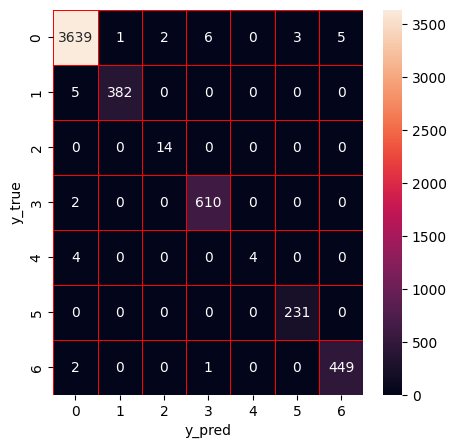

CPU times: total: 688 ms
Wall time: 989 ms


In [9]:
%%time
# Train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# model training
t1 = time.time()
decision_tree.fit(X_train, y_train)
t2 = time.time()
print("Training time: ", t2-t1, "s")

t3 = time.time()
y_pred = decision_tree.predict(X_test)
t4 = time.time()
print("Prediction time per sample: ", (t4-t3)/len(X_test)*1000, "ms")

# Print metrics
print(classification_report(y_test, y_pred))
print("Accuracy of Decision Tree: " + str(accuracy_score(y_test, y_pred)))
print("Precision of Decision Tree: " + str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of Decision Tree: " + str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of Decision Tree: " + str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of Decision Tree for each type of attack: " + str(f1_score(y_test, y_pred, average=None)))
decision_tree_f1 = f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


#### RF

Training time:  3.0926899909973145 s
Prediction time per sample:  0.009861410553775617 ms
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3656
           1       0.96      0.98      0.97       387
           2       1.00      0.93      0.96        14
           3       0.99      1.00      0.99       612
           4       1.00      0.50      0.67         8
           5       0.99      1.00      0.99       231
           6       0.99      0.96      0.98       452

    accuracy                           0.99      5360
   macro avg       0.99      0.91      0.94      5360
weighted avg       0.99      0.99      0.99      5360

Accuracy of RF: 0.9891791044776119
Precision of RF: 0.9892351218555667
Recall of RF: 0.9891791044776119
Average F1 of RF: 0.9890423162501502
F1 of RF for each type of attack: [0.9920765  0.97442455 0.96296296 0.99347471 0.66666667 0.99354839
 0.97522523]


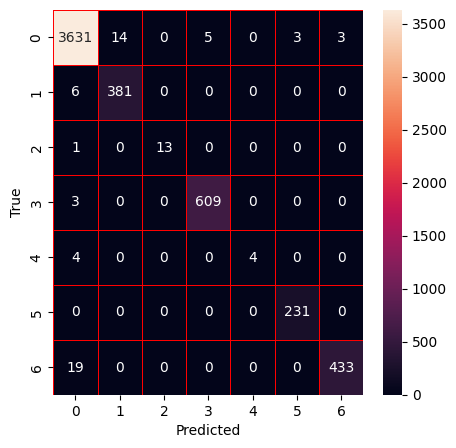

CPU times: total: 3.34 s
Wall time: 3.36 s


In [10]:
%%time

# Train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
t1 = time.time()
rf.fit(X_train, y_train)
t2 = time.time()
print("Training time: ", t2-t1, "s")

# Make predictions
t3 = time.time()
y_pred = rf.predict(X_test)
t4 = time.time()
print("Prediction time per sample: ", (t4-t3)/len(X_test)*1000, "ms")

# Print metrics
print(classification_report(y_test, y_pred))
print("Accuracy of RF: " + str(accuracy_score(y_test, y_pred)))
print("Precision of RF: " + str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of RF: " + str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of RF: " + str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of RF for each type of attack: " + str(f1_score(y_test, y_pred, average=None)))

# Store F1 scores
rf_f1 = f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#### ET

Training time:  0.2760913372039795 s
Prediction time per sample:  0.015071746128708569 ms
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3656
           1       0.95      0.97      0.96       387
           2       0.87      0.93      0.90        14
           3       0.99      0.99      0.99       612
           4       0.80      0.50      0.62         8
           5       0.99      1.00      0.99       231
           6       0.98      0.97      0.98       452

    accuracy                           0.99      5360
   macro avg       0.94      0.91      0.92      5360
weighted avg       0.99      0.99      0.99      5360

Accuracy of ET: 0.9873134328358208
Precision of ET: 0.9872689115602482
Recall of ET: 0.9873134328358208
Average F1 of ET: 0.9872272826668983
F1 of ET for each type of attack: [0.99110442 0.96153846 0.89655172 0.99103504 0.61538462 0.99354839
 0.97886541]


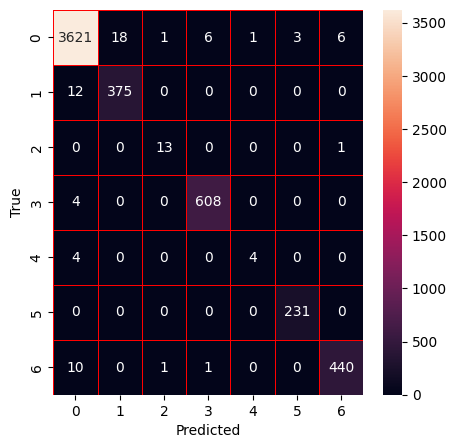

CPU times: total: 1.97 s
Wall time: 575 ms


In [12]:
%%time
# Extra Trees training
et = ExtraTreesClassifier(random_state=42, n_jobs=-1)
t1 = time.time()
et.fit(X_train, y_train)
t2 = time.time()
print("Training time: ", t2 - t1, "s")

# Make predictions
t3 = time.time()
y_pred = et.predict(X_test)
t4 = time.time()
print("Prediction time per sample: ", (t4 - t3) / len(X_test) * 1000, "ms")

# Print metrics
print(classification_report(y_test, y_pred))
print("Accuracy of ET: " + str(accuracy_score(y_test, y_pred)))
print("Precision of ET: " + str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of ET: " + str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of ET: " + str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of ET for each type of attack: " + str(f1_score(y_test, y_pred, average=None)))

# Store F1 scores
et_f1 = f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix (unchanged)
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#### XGBoost

Training time:  5.45345139503479 s
Prediction time per sample:  0.0026050343442319047 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       1.00      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.50      0.67         8
           5       0.99      1.00      0.99       231
           6       1.00      0.99      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.93      0.95      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of XGBoost: 0.9972014925373134
Precision of XGBoost: 0.9972111324737841
Recall of XGBoost: 0.9972014925373134
Average F1 of XGBoost: 0.9970775115273692
F1 of XGBoost for each type of attack: [0.99795054 0.99351492 1.         1.         0.66666667 0.99354839
 0.99667037]


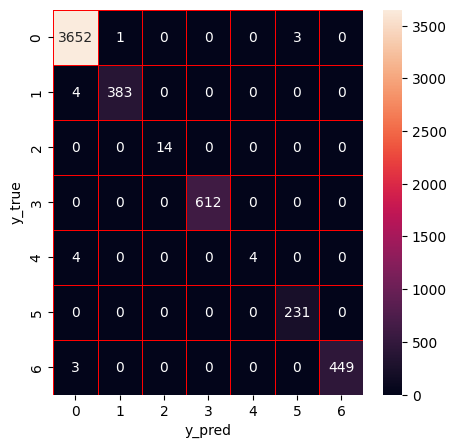

CPU times: total: 1min 15s
Wall time: 5.73 s


In [13]:
%%time
# Train the XGBoost algorithm

xg = xgb.XGBClassifier(random_state=42, objective="multi:softprob", eval_metric="mlogloss")

# X_train_x = X_train.values
# X_test_x = X_test.values

t1 = time.time()
xg.fit(X_train, y_train)
t2 = time.time()
print("Training time: ", t2-t1, "s")

t3 = time.time()
y_pred = xg.predict(X_test)
t4 = time.time()
print("Prediction time per sample: ", (t4-t3)/len(X_test)*1000, "ms")

print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### LightGBM

Training time:  1.6944313049316406 s
Prediction time per sample:  0.006326321345656666 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       0.80      0.50      0.62         8
           5       0.99      1.00      0.99       231
           6       1.00      0.99      1.00       452

    accuracy                           1.00      5360
   macro avg       0.97      0.93      0.94      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of LightGBM: 0.9966417910447761
Precision of LightGBM: 0.9965381451875271
Recall of LightGBM: 0.9966417910447761
Average F1 of LightGBM: 0.9965345747291112
F1 of LightGBM for each type of attack: [0.99781361 0.99222798 1.         0.99754702 0.61538462 0.99354839
 0.99667037]


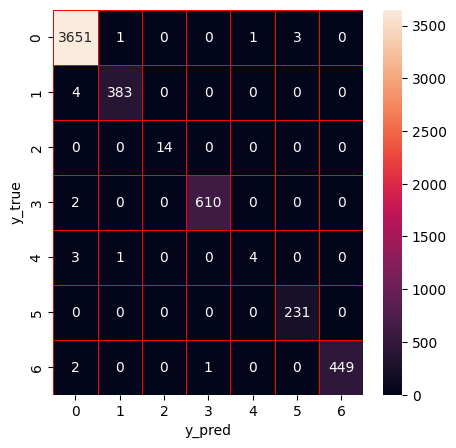

CPU times: total: 21.2 s
Wall time: 1.98 s


In [14]:
%%time
# Train the LightGBM algorithm
lg = lgb.LGBMClassifier(random_state=42)

t1 = time.time()
lg.fit(X_train, y_train)
t2 = time.time()
print("Training time: ", t2-t1, "s")

t3 = time.time()
y_pred = lg.predict(X_test)
t4 = time.time()
print("Prediction time per sample: ", (t4-t3)/len(X_test)*1000, "ms")

print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Initial model selection: XGBoost and LightGBM are the two best-performing models.

### Automated hybrid data balancing
Automated hybrid data balancing approach integrating SMOTE and ADASYN oversampling techniques to address class imbalance issues.

In [15]:
# Display the class distribution in the training set
pd.Series(y_train).value_counts()

Label
0    14569
3     2430
6     1728
1     1579
5     1024
2       82
4       28
Name: count, dtype: int64

In [16]:
# Proposed hybrid data balancing approach
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

# Class-imbalance detection
average_samples_per_class = sum(Counter(y_train).values()) / len(Counter(y_train)) # Average number of samples per class
target_samples = int(average_samples_per_class / 2) # Target number of samples (average number/2) for each minority class
minority_classes = {k: target_samples for k, v in Counter(y_train).items() if v < target_samples}

# Check if there are minority classes
if minority_classes:
    # Apply SMOTE for 50% of the required samples
    smote = SMOTE(n_jobs=-1, sampling_strategy=minority_classes)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Apply ADASYN for 50% of the required samples
    adasyn = ADASYN(n_jobs=-1, sampling_strategy=minority_classes)
    X_train, y_train = adasyn.fit_resample(X_train, y_train)

# Check the final class distribution
print(pd.Series(y_train).value_counts())


Label
0    14569
3     2430
6     1728
1     1579
5     1531
2     1531
4     1531
Name: count, dtype: int64


Training time:  1.9052090644836426 s
Prediction time per sample:  0.004651653232859142 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       1.00      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      1.00      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of LightGBM: 0.9977611940298508
Precision of LightGBM: 0.9977694389383911
Recall of LightGBM: 0.9977611940298508
Average F1 of LightGBM: 0.9977353625642076
F1 of LightGBM for each type of attack: [0.99849665 0.99481865 1.         0.99836334 0.85714286 0.99354839
 0.99778271]


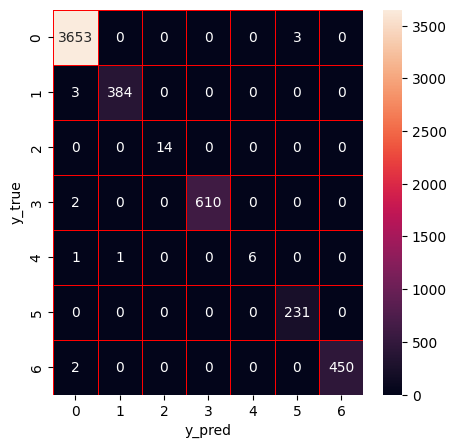

CPU times: total: 25.4 s
Wall time: 2.18 s


In [17]:
%%time
# LightGBM model performance after hybrid data balancing
import lightgbm as lgb
lg = lgb.LGBMClassifier(random_state=42)

t1 = time.time()
lg.fit(X_train, y_train)
t2 = time.time()
print("Training time: ", t2-t1, "s")

t3 = time.time()
y_pred = lg.predict(X_test)
t4 = time.time()
print("Prediction time per sample: ", (t4-t3)/len(X_test)*1000, "ms")

print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Training time:  6.385738134384155 s
Prediction time per sample:  0.0024188365509260944 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      0.99      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of XGBoost: 0.9975746268656717
Precision of XGBoost: 0.9975798396119788
Recall of XGBoost: 0.9975746268656717
Average F1 of XGBoost: 0.9975485445421453
F1 of XGBoost for each type of attack: [0.99849624 0.99353169 1.         0.99918367 0.85714286 0.99137931
 0.99667037]


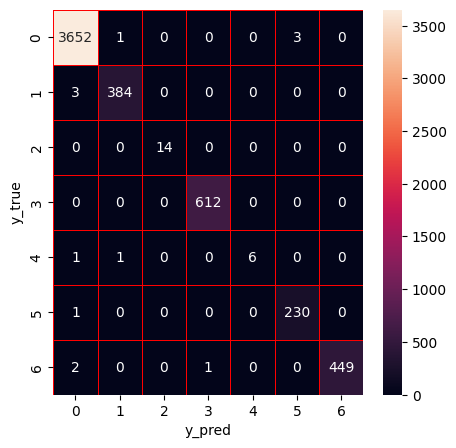

CPU times: total: 1min 30s
Wall time: 6.66 s


In [18]:
%%time
# XGBoost model performance after hybrid data balancing
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=42, objective="multi:softprob", eval_metric="mlogloss")

# X_train_x = X_train.values
# X_test_x = X_test.values

t1 = time.time()
xg.fit(X_train, y_train)
t2 = time.time()
print("Training time: ", t2-t1, "s")

t3 = time.time()
y_pred = xg.predict(X_test)
t4 = time.time()
print("Prediction time per sample: ", (t4-t3)/len(X_test)*1000, "ms")

print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## 2. Automated Feature Selection
Proposed Optimized Importance and Percentage-based Automated Feature Selection (OIP-AutoFS), which is driven by a Multi-Objective Particle Swarm Optimization (MOPSO) and feature importance. The main purpose of this AutoFS process is to optimize the accumulated importance and percentage of features, thus ensuring that the most significant features are used for model training. 

In [ ]:
# Train a baseline LightGBM model on the full feature set to get total feature importance
def get_original_feature_importance(X_train, y_train):
    original_clf = lgb.LGBMClassifier()
    original_clf.fit(X_train, y_train)
    return original_clf.feature_importances_

# Define the objective function (Optimizing Feature Importance and Feature Percentage)
def objective_function(position, X_train, X_test, y_train, y_test, 
                       original_feature_importances, feature_importance_weight=0.9, 
                       feature_percentage_weight=0.1): # Weights for the two objectives, can be tuned
    mask = position > 0.5
    X_train_selected = X_train.iloc[:, mask]
    X_test_selected = X_test.iloc[:, mask]

    if X_train_selected.shape[1] == 0:  # Prevent empty feature selection
        return float('-inf'), 1.0  # Worst possible score

    # Train LightGBM model on selected features
    clf = lgb.LGBMClassifier()
    clf.fit(X_train_selected, y_train)
    
    # Extract the original importance values corresponding to selected features
    selected_feature_importance = original_feature_importances[mask]
    total_selected_importance = np.sum(selected_feature_importance)

    # Normalize feature importance score against the total original importance (range 0-1)
    total_feature_importance_normalized = total_selected_importance / np.sum(original_feature_importances) if np.sum(original_feature_importances) > 0 else 0

    # Compute the percentage of selected features
    num_selected_features = np.sum(mask)
    feature_percentage = num_selected_features / X_train.shape[1]

    # Objective function: Maximizing feature importance and minimizing feature percentage
    score = (
        feature_importance_weight * total_feature_importance_normalized - 
        feature_percentage_weight * feature_percentage
    )

    return score, feature_percentage

# Initialize swarm
def initialize_swarm(num_particles, num_features):
    return [{'position': np.random.rand(num_features), 'velocity': np.random.uniform(-0.1, 0.1, num_features)} for _ in range(num_particles)]

# Update velocity and position with adaptive inertia weight
def update_velocity_position(particle, pbest_position, gbest_position, iteration, max_iterations, 
                             w_max=0.9, w_min=0.4, c1=1.5, c2=1.5):
    
    # **Adaptive inertia weight**: Starts high, decreases over iterations for better convergence
    w = w_max - (w_max - w_min) * (iteration / max_iterations)

    inertia = w * particle['velocity']
    cognitive = c1 * np.random.random() * (pbest_position - particle['position'])
    social = c2 * np.random.random() * (gbest_position - particle['position'])

    inertia = w * particle['velocity']
    cognitive = c1 * np.random.random() * (pbest_position - particle['position'])
    social = c2 * np.random.random() * (gbest_position - particle['position'])
    new_velocity = inertia + cognitive + social
    new_position = particle['position'] + new_velocity

    # Apply bounds
    new_position = np.clip(new_position, 0, 1)
    new_velocity = np.clip(new_velocity, -0.1, 0.1)

    particle['velocity'] = new_velocity
    particle['position'] = new_position

# Main MOPSO function
def mopso(X_train, X_test, y_train, y_test, num_particles=10, max_iterations=20):
    num_features = X_train.shape[1]
    original_feature_importances = get_original_feature_importance(X_train, y_train)  # Get true total feature importance before selection

    swarm = initialize_swarm(num_particles, num_features)
    gbest_score = float('-inf')
    gbest_position = None

    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}/{max_iterations}")
        
        for particle in swarm:
            fitness = objective_function(particle['position'], X_train, X_test, y_train, y_test, original_feature_importances)

            # Update personal best
            if fitness[0] > particle.get('pbest_score', float('-inf')):
                particle['pbest_score'] = fitness[0]
                particle['pbest_position'] = particle['position']

            # Update global best
            if fitness[0] > gbest_score:
                gbest_score = fitness[0]
                gbest_position = particle['position']

        # Update velocity and position
        for particle in swarm:
            update_velocity_position(particle, particle['pbest_position'], gbest_position, iteration, max_iterations)

    # Get final selected features
    selected_features = gbest_position > 0.5
    selected_feature_names = X_train.columns[selected_features].tolist()
    print("\nSelected Features:", selected_feature_names)

    # Compute final selected feature importance
    selected_feature_importance = original_feature_importances[selected_features]
    final_total_selected_importance = np.sum(selected_feature_importance)

    # Normalize feature importance against the total original importance
    final_relative_feature_importance = final_total_selected_importance / np.sum(original_feature_importances) if np.sum(original_feature_importances) > 0 else 0

    # Compute final percentage of selected features
    final_percentage_selected = np.sum(selected_features) / X_train.shape[1]

    print("\nFinal Relative Accumulated Feature Importance Score (0-1):", final_relative_feature_importance)
    print("Final Percentage of Selected Features:", final_percentage_selected)


    return selected_features, gbest_position, selected_feature_importance


In [27]:
selected_features, gbest_position, selected_feature_importance = mopso(X_train, X_test, y_train, y_test)

Iteration 1/20
Iteration 2/20
Iteration 3/20
Iteration 4/20
Iteration 5/20
Iteration 6/20
Iteration 7/20
Iteration 8/20
Iteration 9/20
Iteration 10/20
Iteration 11/20
Iteration 12/20
Iteration 13/20
Iteration 14/20
Iteration 15/20
Iteration 16/20
Iteration 17/20
Iteration 18/20
Iteration 19/20
Iteration 20/20

Selected Features: ['Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'PSH Flag Count', 'URG Flag Count', 'Do

In [28]:
# Create new datasets with selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
len(X_train.columns[selected_features].tolist())


51

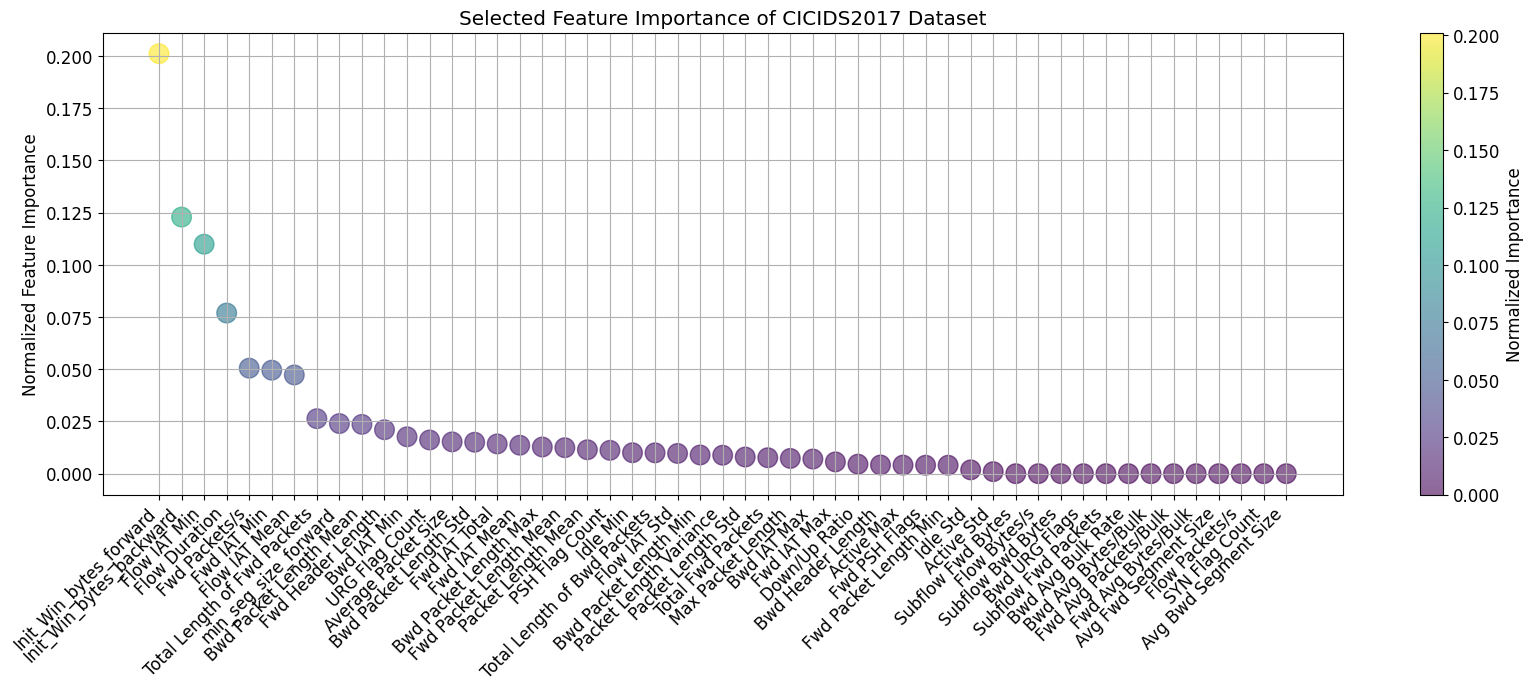

In [29]:
# Plot the feature importance of the selected features
plt.rcParams.update({'font.size': 12})

# Create a DataFrame for easier plotting
features = pd.DataFrame({
    'Feature': X_train.columns[selected_features],
    'Importance': selected_feature_importance
})

# Normalize to relative importance within the selected feature set
imp_sum = features['Importance'].sum()
if imp_sum > 0:
    features['Importance'] = features['Importance'] / imp_sum
else:
    n = len(features)
    features['Importance'] = 1.0 / n if n > 0 else 0.0

# Sort features by importance
features = features.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(20, 6))
scatter = plt.scatter(x='Feature', y='Importance', s=200, c='Importance', cmap='viridis', alpha=0.6, data=features)
plt.colorbar(scatter, label='Normalized Importance')
plt.xticks(rotation=45, ha='right')
plt.title('Selected Feature Importance of CICIDS2017 Dataset')
plt.ylabel('Normalized Feature Importance')
plt.grid(True)
plt.show()

Training time:  2.046781301498413 s
Prediction time per sample:  0.006502955707151498 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       1.00      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      1.00      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of LightGBM: 0.9975746268656717
Precision of LightGBM: 0.9975820780510746
Recall of LightGBM: 0.9975746268656717
Average F1 of LightGBM: 0.9975480237376534
F1 of LightGBM for each type of attack: [0.99849665 0.99351492 1.         0.99754702 0.85714286 0.99354839
 0.99778271]


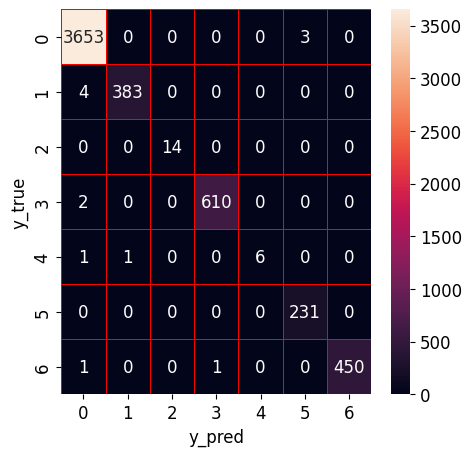

CPU times: total: 23.5 s
Wall time: 2.35 s


In [30]:
%%time
# LightGBM model performance after AutoDP and AutoFS
import lightgbm as lgb
lg = lgb.LGBMClassifier(random_state=42)

t1 = time.time()
lg.fit(X_train_selected, y_train)
t2 = time.time()
print("Training time: ", t2-t1, "s")

t3 = time.time()
y_pred = lg.predict(X_test_selected)
t4 = time.time()
print("Prediction time per sample: ", (t4-t3)/len(X_test)*1000, "ms")

print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Training time:  5.725935697555542 s
Prediction time per sample:  0.0022494526051763278 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       1.00      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      1.00      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of XGBoost: 0.9977611940298508
Precision of XGBoost: 0.9977704081184646
Recall of XGBoost: 0.9977611940298508
Average F1 of XGBoost: 0.9977346962205456
F1 of XGBoost for each type of attack: [0.99849665 0.99480519 1.         0.99836601 0.85714286 0.99354839
 0.99778271]


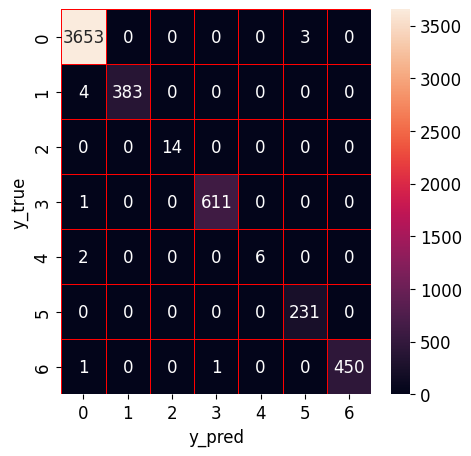

CPU times: total: 1min 16s
Wall time: 6 s


In [31]:
%%time
# XGBoost model performance after AutoDP and AutoFS
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=42, objective="multi:softprob", eval_metric="mlogloss")

# X_train_x = X_train.values
# X_test_x = X_test.values

t1 = time.time()
xg.fit(X_train_selected, y_train)
t2 = time.time()
print("Training time: ", t2-t1, "s")

t3 = time.time()
y_pred = xg.predict(X_test_selected)
t4 = time.time()
print("Prediction time per sample: ", (t4-t3)/len(X_test)*1000, "ms")

print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## 3. Model Selection and Hyperparameter Optimization
The automated model learning and optimization using the proposed OPCE-CASH method is the final phase, a critical step where XGBoost and LightGBM are automatically optimized and selected using the MOPSO model. This phase aims to optimize the F1-score (representing model effectiveness), confidence values (representing model reliability), and execution time (indicating model complexity). 

### Optimize the LightGBM model

In [32]:
# Display the default hyperparameters of LightGBM
lg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [33]:
# Write the MOPSO algorithm to optimize LightGBM hyperparameters

counter = 0  # Declare this at the top-level script
# Define the objective function (Optimizing F1 Score, Average Confidence, and Training Time)
def objective_function(position, X_train, X_test, y_train, y_test, f1_weight=0.90, confidence_weight=0.05, time_weight=0.05):
    global counter  # Declare counter as global to modify it
    counter += 1  # Increment counter
    
    start_time = time.time()

    # Apply hard constraints
    position[0] = np.clip(position[0], 50, 200)  # n_estimators
    position[1] = np.clip(position[1], 5, 100)    # max_depth
    position[2] = np.clip(position[2], 0.01, 0.3)  # learning_rate
    position[3] = np.clip(position[3], 10, 50)   # num_leaves
    position[4] = np.clip(position[4], 10, 50)   # min_child_samples

    hyperparams = {
        'n_estimators': int(position[0]),
        'max_depth': int(position[1]),
        'learning_rate': position[2],
        'num_leaves': int(position[3]),
        'min_child_samples': int(position[4])
    }

    print(f"Evaluation {counter}: Hyperparameters before training:", hyperparams)  # Debugging line

    clf = lgb.LGBMClassifier(**hyperparams, random_state=42)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    proba = clf.predict_proba(X_test)
    
    f1 = f1_score(y_test, predictions, average='weighted')
    negative_f1 = -f1 * f1_weight
    
    avg_confidence = np.mean(np.max(proba, axis=1))
    negative_avg_confidence = -avg_confidence * confidence_weight
    
    elapsed_time = time.time() - start_time
    weighted_elapsed_time = elapsed_time * time_weight
    
    return negative_f1, negative_avg_confidence, weighted_elapsed_time



# Initialize swarm
def initialize_swarm(num_particles):
    return [{'position': np.array([100, 10, 0.1, 31, 20]) + np.random.uniform(-10, 10, 5), 
             'velocity': np.random.uniform(-0.1, 0.1, 5)} for _ in range(num_particles)]

# Update velocity and position with adaptive inertia weight
def update_velocity_position(particle, pbest_position, gbest_position, iteration, max_iterations, 
                             w_max=0.9, w_min=0.4, c1=1.5, c2=1.5):
    
    # **Adaptive inertia weight**: Starts high, decreases over iterations for better convergence
    w = w_max - (w_max - w_min) * (iteration / max_iterations)

    inertia = w * particle['velocity']
    cognitive = c1 * np.random.random() * (pbest_position - particle['position'])
    social = c2 * np.random.random() * (gbest_position - particle['position'])
    
    new_velocity = inertia + cognitive + social
    new_position = particle['position'] + new_velocity
    
    # Apply constraints
    new_position[0] = np.clip(new_position[0], 50, 200)  # n_estimators
    new_position[1] = np.clip(new_position[1], 5, 100)    # max_depth
    new_position[2] = np.clip(new_position[2], 0.01, 0.3)  # learning_rate
    new_position[3] = np.clip(new_position[3], 10, 50)   # num_leaves
    new_position[4] = np.clip(new_position[4], 10, 50)   # min_child_samples

    particle['velocity'] = new_velocity
    particle['position'] = new_position


# Main MOPSO function
def mopso(X_train, X_test, y_train, y_test, num_particles=20, max_iterations=20):
    swarm = initialize_swarm(num_particles)
    gbest_score = np.array([float('inf')] * 3)
    gbest_position = None

    for iteration in range(max_iterations):
        for particle in swarm:
            fitness = np.array(objective_function(particle['position'], X_train, X_test, y_train, y_test))

            if np.sum(fitness) < np.sum(particle.get('pbest_score', np.array([float('inf')] * 3))):
                particle['pbest_score'] = fitness
                particle['pbest_position'] = particle['position']

            if np.sum(fitness) < np.sum(gbest_score):
                gbest_score = fitness
                gbest_position = particle['position']

        for particle in swarm:
            update_velocity_position(particle, particle['pbest_position'], gbest_position, iteration, max_iterations)

    
    print(f"Optimal hyperparameters are n_estimators: {int(gbest_position[0])}, max_depth: {int(gbest_position[1])}, learning_rate: {gbest_position[2]}, num_leaves: {int(gbest_position[3])}, min_child_samples: {int(gbest_position[4])}")

    return {
        'n_estimators': int(gbest_position[0]),
        'max_depth': int(gbest_position[1]),
        'learning_rate': gbest_position[2],
        'num_leaves': int(gbest_position[3]),
        'min_child_samples': int(gbest_position[4])
    }




In [34]:
# Running MOPSO
best_hyperparams = mopso(X_train_selected, X_test_selected, y_train, y_test)

Evaluation 1: Hyperparameters before training: {'n_estimators': 102, 'max_depth': 9, 'learning_rate': 0.01, 'num_leaves': 23, 'min_child_samples': 27}
Evaluation 2: Hyperparameters before training: {'n_estimators': 97, 'max_depth': 15, 'learning_rate': 0.01, 'num_leaves': 40, 'min_child_samples': 19}
Evaluation 3: Hyperparameters before training: {'n_estimators': 104, 'max_depth': 18, 'learning_rate': 0.01, 'num_leaves': 40, 'min_child_samples': 18}
Evaluation 4: Hyperparameters before training: {'n_estimators': 108, 'max_depth': 6, 'learning_rate': 0.3, 'num_leaves': 28, 'min_child_samples': 29}
Evaluation 5: Hyperparameters before training: {'n_estimators': 107, 'max_depth': 14, 'learning_rate': 0.01, 'num_leaves': 31, 'min_child_samples': 10}
Evaluation 6: Hyperparameters before training: {'n_estimators': 104, 'max_depth': 13, 'learning_rate': 0.01, 'num_leaves': 21, 'min_child_samples': 20}
Evaluation 7: Hyperparameters before training: {'n_estimators': 96, 'max_depth': 13, 'learni

Training time:  0.5277619361877441 s
Prediction time per sample:  0.004093460182645428 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       1.00      0.98      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      0.99      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of LightGBM: 0.996455223880597
Precision of LightGBM: 0.9964645387844323
Recall of LightGBM: 0.996455223880597
Average F1 of LightGBM: 0.9964269568806875
F1 of LightGBM for each type of attack: [0.99754031 0.99089727 1.         0.99591837 0.85714286 0.99354839
 0.99667037]


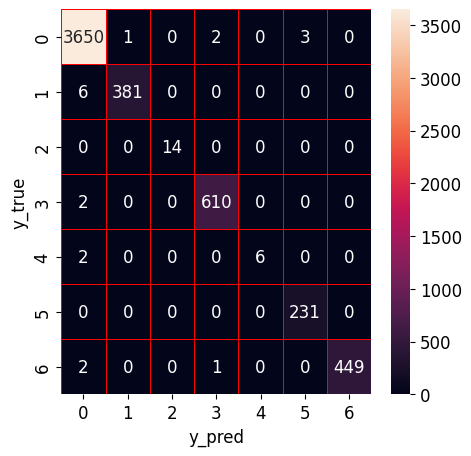

CPU times: total: 6.98 s
Wall time: 882 ms


In [ ]:
%%time
# LightGBM model performance
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the LightGBM algorithm with the best hyperparameters
lg = lgb.LGBMClassifier(**best_hyperparams, random_state=42)

t1 = time.time()
lg.fit(X_train_selected, y_train)
t2 = time.time()
print("Training time: ", t2-t1, "s")

t3 = time.time()
y_pred = lg.predict(X_test_selected)
t4 = time.time()
print("Prediction time per sample: ", (t4-t3)/len(X_test)*1000, "ms")

print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
# Save the LightGBM model and report its size and average confidence
import joblib
import os

joblib.dump(lg, "lightgbm_model_all.pkl")
lgb_model_size = os.path.getsize("lightgbm_model_all.pkl") / (1024 * 1024)
print(f"LightGBM Model Size: {lgb_model_size:.2f} MB")

# Predict probabilities
y_proba = lg.predict_proba(X_test_selected)

# Compute average confidence
avg_conf = np.mean(np.max(y_proba, axis=1))
print(f"Average Confidence: {avg_conf:.4f}")

from sklearn.calibration import calibration_curve
import numpy as np

def compute_ece(y_true, y_proba, n_bins=10):
    y_pred_class = np.argmax(y_proba, axis=1)
    correct = (np.array(y_true) == y_pred_class).astype(int)
    confidence = np.max(y_proba, axis=1)

    prob_true, prob_pred = calibration_curve(correct, confidence, n_bins=n_bins)
    bin_counts, _ = np.histogram(confidence, bins=n_bins)
    bin_weights = bin_counts[:len(prob_true)] / np.sum(bin_counts)

    ece = np.sum(np.abs(prob_true - prob_pred) * bin_weights)
    return ece

ece = compute_ece(y_test, y_proba)
print(f"ECE: {ece:.4f}")

from sklearn.utils import resample

def bootstrap_ci(data, n_bootstraps=1000, alpha=0.05):
    boot_means = [np.mean(resample(data)) for _ in range(n_bootstraps)]
    lower = np.percentile(boot_means, 100 * (alpha / 2))
    upper = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lower, upper

confidences = np.max(y_proba, axis=1)
ci_lower, ci_upper = bootstrap_ci(confidences)
print(f"95% CI for Avg Confidence: [{ci_lower:.4f}, {ci_upper:.4f}]")


LightGBM Model Size: 0.42 MB
Average Confidence: 0.9984
ECE: 0.0007
95% CI for Avg Confidence: [0.9978, 0.9988]


### Optimize the XGBoost model

In [38]:
# Display the default hyperparameters of XGBoost
xg.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
# Write the MOPSO algorithm to optimize XGBoost hyperparameters

counter = 0  # Declare this at the top-level script

# Define the objective function (Optimizing F1 Score, Average Confidence, and Training Time)
def objective_function(position, X_train, X_test, y_train, y_test, f1_weight=0.95, confidence_weight=0.01, time_weight=0.04):
# def objective_function(position, X_train, X_test, y_train, y_test, f1_weight=0.8, confidence_weight=0.05, time_weight=0.15):
    global counter  # Declare counter as global to modify it
    counter += 1  # Increment counter
    
    start_time = time.time()

    # Apply hard constraints
    position[0] = np.clip(position[0], 50, 200)  # n_estimators
    position[1] = np.clip(position[1], 5, 50)    # max_depth
    position[2] = np.clip(position[2], 0.01, 0.3)  # learning_rate

    hyperparams = {
        'n_estimators': int(position[0]),
        'max_depth': int(position[1]),
        'learning_rate': position[2]
    }

    print(f"Evaluation {counter}: Hyperparameters before training:", hyperparams)  # Debugging line

    clf = xgb.XGBClassifier(**hyperparams, random_state=42, objective="multi:softprob", eval_metric="mlogloss")
    # clf.fit(X_train, y_train)
    clf.fit(X_train, y_train,         
    eval_set=[(X_test, y_test)],
        early_stopping_rounds=10, verbose=False)  # check whether to set early_stopping_rounds to reduce time
    
    predictions = clf.predict(X_test)
    proba = clf.predict_proba(X_test)
    
    f1 = f1_score(y_test, predictions, average='weighted')
    negative_f1 = -f1 * f1_weight
    
    avg_confidence = np.mean(np.max(proba, axis=1))
    negative_avg_confidence = -avg_confidence * confidence_weight
    
    elapsed_time = time.time() - start_time
    weighted_elapsed_time = elapsed_time * time_weight
    
    return negative_f1, negative_avg_confidence, weighted_elapsed_time

def initialize_swarm(num_particles):
    return [{'position': np.array([100, 10, 0.1]) + np.random.uniform(-10, 10, 3), 
             'velocity': np.random.uniform(-0.1, 0.1, 3)} for _ in range(num_particles)]

# Update velocity and position with adaptive inertia weight
def update_velocity_position(particle, pbest_position, gbest_position, iteration, max_iterations, 
                             w_max=0.9, w_min=0.4, c1=1.5, c2=1.5):
    
    # **Adaptive inertia weight**: Starts high, decreases over iterations for better convergence
    w = w_max - (w_max - w_min) * (iteration / max_iterations)

    inertia = w * particle['velocity']
    cognitive = c1 * np.random.random() * (pbest_position - particle['position'])
    social = c2 * np.random.random() * (gbest_position - particle['position'])

    # Compute new velocity
    new_velocity = inertia + cognitive + social

    # Compute new position
    new_position = particle['position'] + new_velocity

    # **Apply constraints to hyperparameters**
    new_position[0] = np.clip(new_position[0], 50, 200)  # n_estimators
    new_position[1] = np.clip(new_position[1], 5, 50)    # max_depth (Reduced upper limit)
    new_position[2] = np.clip(new_position[2], 0.01, 0.3)  # learning_rate (Narrowed range)

    # Update particle velocity and position
    particle['velocity'] = new_velocity
    particle['position'] = new_position



# Main MOPSO function
def mopso(X_train, X_test, y_train, y_test, num_particles=10, max_iterations=20):
    swarm = initialize_swarm(num_particles)
    gbest_score = np.array([float('inf')] * 3)
    gbest_position = None
    
    for iteration in range(max_iterations):
        for particle in swarm:
            fitness = np.array(objective_function(particle['position'], X_train, X_test, y_train, y_test))
            
            if np.sum(fitness) < np.sum(particle.get('pbest_score', np.array([float('inf')] * 3))):
                particle['pbest_score'] = fitness
                particle['pbest_position'] = particle['position']
                
            if np.sum(fitness) < np.sum(gbest_score):
                gbest_score = fitness
                gbest_position = particle['position']
                
        for particle in swarm:
            update_velocity_position(particle, particle['pbest_position'], gbest_position, iteration, max_iterations)
    
    print(f"Optimal hyperparameters are n_estimators: {int(gbest_position[0])}, max_depth: {int(gbest_position[1])}, learning_rate: {gbest_position[2]}")
    
    return {
        'n_estimators': int(gbest_position[0]),
        'max_depth': int(gbest_position[1]),
        'learning_rate': gbest_position[2]
    }




In [41]:
# Running MOPSO
best_hyperparams = mopso(X_train_selected, X_test_selected, y_train, y_test)

Evaluation 1: Hyperparameters before training: {'n_estimators': 90, 'max_depth': 13, 'learning_rate': 0.3}
Evaluation 2: Hyperparameters before training: {'n_estimators': 92, 'max_depth': 16, 'learning_rate': 0.3}
Evaluation 3: Hyperparameters before training: {'n_estimators': 94, 'max_depth': 8, 'learning_rate': 0.08690852561396448}
Evaluation 4: Hyperparameters before training: {'n_estimators': 94, 'max_depth': 5, 'learning_rate': 0.3}
Evaluation 5: Hyperparameters before training: {'n_estimators': 108, 'max_depth': 5, 'learning_rate': 0.3}
Evaluation 6: Hyperparameters before training: {'n_estimators': 102, 'max_depth': 11, 'learning_rate': 0.3}
Evaluation 7: Hyperparameters before training: {'n_estimators': 109, 'max_depth': 14, 'learning_rate': 0.01}
Evaluation 8: Hyperparameters before training: {'n_estimators': 105, 'max_depth': 5, 'learning_rate': 0.01}
Evaluation 9: Hyperparameters before training: {'n_estimators': 106, 'max_depth': 5, 'learning_rate': 0.01}
Evaluation 10: Hyp

Training time:  5.10028862953186 s
Prediction time per sample:  0.0024188365509260944 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      0.99      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of XGBoost: 0.996455223880597
Precision of XGBoost: 0.9964599234841562
Recall of XGBoost: 0.996455223880597
Average F1 of XGBoost: 0.9964283982823329
F1 of XGBoost for each type of attack: [0.99767664 0.98963731 1.         0.99673203 0.85714286 0.99137931
 0.99667037]


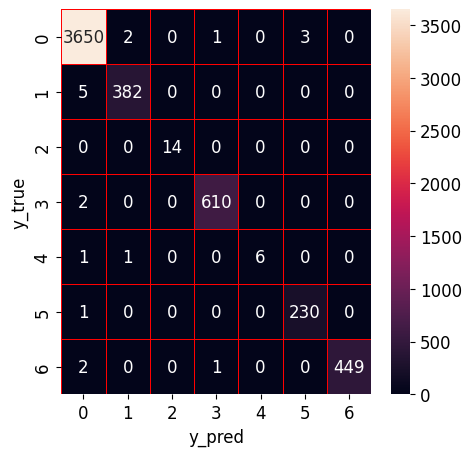

CPU times: total: 1min 10s
Wall time: 5.38 s


In [43]:
%%time
# XGBoost model performance
xg = xgb.XGBClassifier(**best_hyperparams, random_state=42, objective="multi:softprob", eval_metric="mlogloss")

# X_train_x = X_train.values
# X_test_x = X_test.values

t1 = time.time()
xg.fit(X_train_selected, y_train)
t2 = time.time()
print("Training time: ", t2-t1, "s")

t3 = time.time()
y_pred = xg.predict(X_test_selected)
t4 = time.time()
print("Prediction time per sample: ", (t4-t3)/len(X_test)*1000, "ms")

print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [44]:
# Save the XGBoost model and report its size and average confidence

# Save model
joblib.dump(xg, "xgboost_model_all.pkl")

# Check file size in MB
xgb_model_size = os.path.getsize("xgboost_model_all.pkl") / (1024 * 1024)
print(f"XGBoost Model Size: {xgb_model_size:.2f} MB")

# Get predicted probabilities
y_proba = xg.predict_proba(X_test_selected)

# Compute average confidence
avg_conf = np.mean(np.max(y_proba, axis=1))
print(f"Average Confidence: {avg_conf:.4f}")

from sklearn.calibration import calibration_curve
import numpy as np

def compute_ece(y_true, y_proba, n_bins=10):
    y_pred_class = np.argmax(y_proba, axis=1)
    correct = (np.array(y_true) == y_pred_class).astype(int)
    confidence = np.max(y_proba, axis=1)

    prob_true, prob_pred = calibration_curve(correct, confidence, n_bins=n_bins)
    bin_counts, _ = np.histogram(confidence, bins=n_bins)
    bin_weights = bin_counts[:len(prob_true)] / np.sum(bin_counts)

    ece = np.sum(np.abs(prob_true - prob_pred) * bin_weights)
    return ece

ece = compute_ece(y_test, y_proba)
print(f"ECE: {ece:.4f}")

from sklearn.utils import resample

def bootstrap_ci(data, n_bootstraps=1000, alpha=0.05):
    boot_means = [np.mean(resample(data)) for _ in range(n_bootstraps)]
    lower = np.percentile(boot_means, 100 * (alpha / 2))
    upper = np.percentile(boot_means, 100 * (1 - alpha / 2))
    return lower, upper

confidences = np.max(y_proba, axis=1)
ci_lower, ci_upper = bootstrap_ci(confidences)
print(f"95% CI for Avg Confidence: [{ci_lower:.4f}, {ci_upper:.4f}]")



XGBoost Model Size: 1.04 MB
Average Confidence: 0.9981
ECE: 0.0005
95% CI for Avg Confidence: [0.9975, 0.9987]
